<hr>
<br><br>
    <h1 align=center><font size = 5>Exercício prático - Semana 2 (Quinta)
    <br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    Análise dos estudantes de medicina</font></h1>
<br><br>

#### Perguntas que iremos responder

<aside>

- Qual o significado das variáveis do dataframe?
- Quais os tipos de variáveis você tem?
- Tem estudante duplicado?
- A base tem dados nulos? Se sim, vamos tratar
- O tipo das variáveis está certo?
- Qual a média da idade dos estudantes de medicina?
- Qual percentual por gênero dos estudantes?
- Qual o tipo sanguineo mais comum entre os estudantes?
- A maioria dos estudantes tem diabetes?
- Qual percentual de homens e mulheres que fumam?
- Qual percentual de homens e mulheres que tem diabetes?
- Qual a distribuição da massa corporal dos estudantes?
- Qual a distribuição das idades dos estudantes? É assimétrico?
- Qual a distribuição das idades dos estudantes por gênero?
- Qual a distribuição do colesterol dos estudantes? É assimétrico?
- Qual a distribuição do colesterol dos estudantes por gênero?
- Qual a distribuição do peso dos estudantes? É assimétrico?
- Qual a distribuição da altura dos estudantes? É assimétrico?
- Qual o principal tipo sanguineo dos estudantes masculinos?
</aside>

## 1. Preparação do ambiente <a id="1"></a>


<h4>1.1 Importação de bibliotecas:</h4><a id="11"></a>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4>1.2 Leitura de dados:</h4> <a id="12"></a>

In [2]:
df = pd.read_csv('medical_students_dataset.csv')
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [3]:
df.shape

(200000, 13)

Temos 13 variáveis disponíveis e aparentemente 200.000 estudantes

<h4>1.3  Identificação de valores faltantes</h4> <a id="12"></a>

In [4]:
faltantes = pd.DataFrame({'colunas':df.columns, 
                      'tipo':df.dtypes,
                      'Qtde valores NaN':df.isna().sum(),
                      '% valores NaN':df.isna().sum()/df.shape[0],
                      'valores únicos por feature':df.nunique()})
faltantes = faltantes.reset_index()
faltantes

,index,colunas,tipo,Qtde valores NaN,% valores NaN,valores únicos por feature
0,Student ID,Student ID,float64,20000,0.1,98976
1,Age,Age,float64,20000,0.1,17
2,Gender,Gender,object,20000,0.1,2
3,Height,Height,float64,20000,0.1,98992
4,Weight,Weight,float64,20000,0.1,99026
5,Blood Type,Blood Type,object,20000,0.1,4
6,BMI,BMI,float64,20000,0.1,98983
7,Temperature,Temperature,float64,20000,0.1,99006
8,Heart Rate,Heart Rate,float64,20000,0.1,40
9,Blood Pressure,Blood Pressure,float64,20000,0.1,50


Temos valores faltantes nas em todas as variáveis do dataframe

As variáveis que estão com tipos errados é o ID do estudante e a idade (Age) que deveriam ser em um formato Int (inteiro) ao invés de float

Mas antes de tratar o tipo, é necessário tratar os nulos

<h4>1.4  Tratando valores faltantes</h4> <a id="12"></a>

In [6]:
df[df['Student ID'].isna()]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
15,NaN,21.0,Male,162.819718,96.385698,B,NaN,98.108563,68.0,126.0,130.0,No,No
33,NaN,33.0,Male,177.165911,68.129149,O,21.705642,98.201649,NaN,116.0,143.0,Yes,Yes
39,NaN,24.0,NaN,158.110951,53.034904,B,21.214748,98.448841,78.0,NaN,157.0,No,No
55,NaN,20.0,Female,164.746140,94.441970,O,34.796418,99.289035,84.0,93.0,240.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199917,NaN,30.0,Male,160.993293,48.725905,B,18.799416,98.220218,NaN,91.0,139.0,No,No
199940,NaN,30.0,NaN,158.451908,75.739627,AB,30.166729,98.089516,73.0,108.0,143.0,No,No
199941,NaN,NaN,NaN,167.192837,50.169768,NaN,17.947616,97.584901,81.0,107.0,244.0,No,Yes
199956,NaN,21.0,Female,NaN,91.240475,B,30.272756,NaN,71.0,98.0,176.0,No,Yes


Em relação aos estudantes com ID faltando, podemos remover eles pois não temos garantia de que são estudantes ativos, na vida real é importante nessa etapa entender porque isso aconteceu

In [10]:
df.dropna(subset='Student ID',inplace=True)

In [11]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
5,6.0,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes


Agora sim vamos seguir para as outras colunas

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             161947 non-null  float64
 2   Gender          162001 non-null  object 
 3   Height          161972 non-null  float64
 4   Weight          161987 non-null  float64
 5   Blood Type      161963 non-null  object 
 6   BMI             162014 non-null  float64
 7   Temperature     162025 non-null  float64
 8   Heart Rate      161961 non-null  float64
 9   Blood Pressure  162016 non-null  float64
 10  Cholesterol     161986 non-null  float64
 11  Diabetes        162077 non-null  object 
 12  Smoking         161988 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.2+ MB


In [13]:
df.Gender.fillna('Não informado',inplace=True)

In [15]:
df.Diabetes.fillna('Não informado',inplace=True)
df.Smoking.fillna('Não informado',inplace=True)
df['Blood Type'].fillna('Não informado',inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             161947 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          161972 non-null  float64
 4   Weight          161987 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             162014 non-null  float64
 7   Temperature     162025 non-null  float64
 8   Heart Rate      161961 non-null  float64
 9   Blood Pressure  162016 non-null  float64
 10  Cholesterol     161986 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.2+ MB


In [29]:
median_value = df['Age'].median()
df['Age'].fillna(value=median_value, inplace=True)


In [18]:
median_value = df['Height'].median()
df['Height'].fillna(value=median_value, inplace=True)


In [19]:
mean_value = df['BMI'].mean()
df['BMI'].fillna(value=mean_value, inplace=True)


In [20]:
mean_value = df['Temperature'].mean()
df['Temperature'].fillna(value=mean_value, inplace=True)


In [21]:
mean_value = df['Blood Pressure'].mean()
df['Blood Pressure'].fillna(value=mean_value, inplace=True)


In [22]:
mean_value = df['Cholesterol'].mean()
df['Cholesterol'].fillna(value=mean_value, inplace=True)


In [24]:
mean_value = df['Heart Rate'].mean()
df['Heart Rate'].fillna(value=mean_value, inplace=True)


In [25]:
mean_value = df['Weight'].mean()
df['Weight'].fillna(value=mean_value, inplace=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.2+ MB


Tratamos todas as variáveis

In [43]:
df['Student ID'] = df['Student ID'].astype(int)
df['Age'] = df['Age'].astype(int)

In [44]:
df.shape

(180000, 13)

In [57]:
df[df.duplicated(subset=['Student ID'],keep=False)].sort_values(by='Student ID')

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
1,2,26,Male,152.069157,47.630941,B,23.344400,98.714977,93.000000,104.000000,163.000000,No,No
100001,2,34,Male,152.069157,47.630941,B,20.597139,98.714977,93.000000,104.000000,163.000000,No,No
100004,5,23,Female,179.339293,46.234173,O,14.375143,98.480008,95.000000,139.000000,231.000000,No,No
4,5,23,Female,174.886452,46.234173,O,23.344400,98.480008,95.000000,114.563642,231.000000,No,No
5,6,32,Não informado,151.491294,68.647805,B,29.912403,99.668373,70.000000,128.000000,183.000000,Não informado,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,99998,34,Não informado,173.275523,99.648914,B,33.189303,98.768210,60.000000,90.000000,154.000000,No,No
199998,99999,30,Female,156.446944,50.142824,A,20.486823,98.994212,61.000000,106.000000,225.000000,No,No
99998,99999,30,Female,156.446944,50.142824,A,20.486823,98.994212,79.508913,106.000000,184.464806,No,No
99999,100000,20,Female,153.927409,99.928405,Não informado,42.175189,98.595817,95.000000,133.000000,132.000000,No,No


Temos estudantes com IDs iguais mas informações diferentes. O ideal seria apresentar esses caso para a área de negócios. E para não duplicar informações e tirarmos insights errados, iremos deletar os duplicados e manter somente o primeiro registro

In [61]:
df_sem_duplicados = df.drop_duplicates(subset=['Student ID'])
df_sem_duplicados

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1,18,Female,161.777924,72.354947,O,27.645835,98.600843,95.0,109.000000,203.000000,No,Não informado
1,2,26,Male,152.069157,47.630941,B,23.344400,98.714977,93.0,104.000000,163.000000,No,No
2,3,32,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.000000,Yes,No
4,5,23,Female,174.886452,46.234173,O,23.344400,98.480008,95.0,114.563642,231.000000,No,No
5,6,32,Não informado,151.491294,68.647805,B,29.912403,99.668373,70.0,128.000000,183.000000,Não informado,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199946,99947,26,Male,174.886452,97.379731,Não informado,40.014870,98.808795,82.0,100.000000,235.000000,No,No
199950,99951,21,Male,164.162060,55.931108,B,20.754288,98.121215,94.0,124.000000,123.000000,No,No
199960,99961,26,Female,188.117099,48.203411,AB,23.344400,98.528649,93.0,129.000000,190.000000,Yes,Não informado
199993,99994,22,Male,174.886452,46.155224,A,23.344400,98.331019,93.0,100.000000,184.464806,Yes,No


## 2. Análise descritiva e diagnóstica <a id="2"></a>

/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

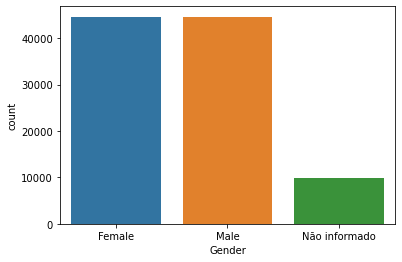

In [62]:
sns.countplot(df_sem_duplicados.Gender)

In [63]:
df_sem_duplicados.Gender.value_counts()

Male             44600
Female           44519
Não informado     9857
Name: Gender, dtype: int64

In [64]:
total_de_mulheres = df_sem_duplicados.Gender.value_counts()[0]
total_de_homens = df_sem_duplicados.Gender.value_counts()[1]
total = df_sem_duplicados.shape[0]

In [65]:

percentual_mulheres = (total_de_mulheres*100)/total
percentual_homens = (total_de_homens*100)/total

In [66]:
print(f"Porcentagem de mulheres é: {percentual_mulheres}")
print(f"Porcentagem de homens é: {percentual_homens}")

Porcentagem de mulheres é: 45.061429033301
Porcentagem de homens é: 44.9795910119625


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diabetes', ylabel='count'>

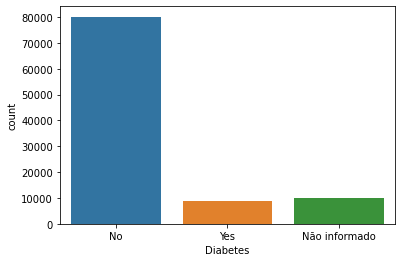

In [75]:
sns.countplot(df_sem_duplicados.Diabetes)

In [76]:
df_sem_duplicados.Diabetes.value_counts()

No               80176
Não informado     9910
Yes               8890
Name: Diabetes, dtype: int64

In [78]:
sem_diabetes = df_sem_duplicados.Diabetes.value_counts()[0]
diabetico = df_sem_duplicados.Diabetes.value_counts()[2]


In [79]:

percentual_nao_diabetico = (sem_diabetes*100)/total
percentual_diabetico = (diabetico*100)/total

In [80]:
print(f"Porcentagem de não diabeticos: {percentual_nao_diabetico}")
print(f"Porcentagem de diabeticos: {percentual_diabetico}")

Porcentagem de não diabeticos: 81.00549628192694
Porcentagem de diabeticos: 8.98197542838668


In [141]:
diabeticos_genero = df_sem_duplicados[df_sem_duplicados.Diabetes == 'Yes'].Gender.value_counts()
homens_diabeticos = diabeticos_genero[0]
mulheres_diabeticos = diabeticos_genero[1]

In [142]:
total_diabeticos = df_sem_duplicados[df_sem_duplicados.Diabetes == 'Yes'].shape[0]

In [143]:
percentual_h_diabeticos = (homens_diabeticos*100)/total_diabeticos
percentual_f_diabeticos = (mulheres_diabeticos*100)/total_diabeticos

In [145]:
print(f"Porcentagem de homens diabeticos: {percentual_h_diabeticos}")
print(f"Porcentagem de mulheres diabeticos: {percentual_f_diabeticos}")

Porcentagem de homens diabeticos: 45.691788526434195
Porcentagem de mulheres diabeticos: 44.38695163104612


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Smoking', ylabel='count'>

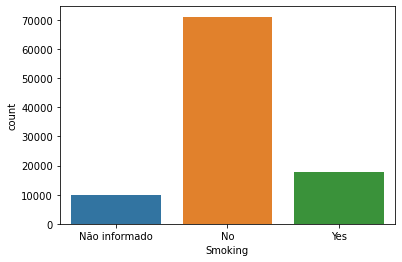

In [122]:
sns.countplot(df_sem_duplicados.Smoking)

In [123]:
df_sem_duplicados.Smoking.value_counts()

No               71127
Yes              17833
Não informado    10016
Name: Smoking, dtype: int64

In [124]:
nao_fumante = df_sem_duplicados.Smoking.value_counts()[0]
fumante = df_sem_duplicados.Smoking.value_counts()[1]


In [125]:

percentual_nao_fumante = (nao_fumante*100)/total
percentual_fumante = (fumante*100)/total

In [126]:
print(f"Porcentagem de não fumantes: {percentual_nao_fumante}")
print(f"Porcentagem de fumantes: {percentual_fumante}")

Porcentagem de não fumantes: 71.86287584869059
Porcentagem de fumantes: 18.017499191723246


In [131]:
fumantes_genero = df_sem_duplicados[df_sem_duplicados.Smoking == 'Yes'].Gender.value_counts()
homens_fumantes = fumantes_genero[0]
mulheres_fumantes = fumantes_genero[1]

In [132]:
fumantes_genero

Male             8101
Female           7964
Não informado    1768
Name: Gender, dtype: int64

In [133]:
total_fumantes = df_sem_duplicados[df_sem_duplicados.Smoking == 'Yes'].shape[0]

In [134]:
percentual_h_fumante = (homens_fumantes*100)/total_fumantes
percentual_f_fumante = (mulheres_fumantes*100)/total_fumantes

In [135]:
print(f"Porcentagem de homens fumantes: {percentual_h_fumante}")
print(f"Porcentagem de mulheres fumantes: {percentual_f_fumante}")

Porcentagem de homens fumantes: 45.42701732742668
Porcentagem de mulheres fumantes: 44.658778668760164


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Blood Type', ylabel='count'>

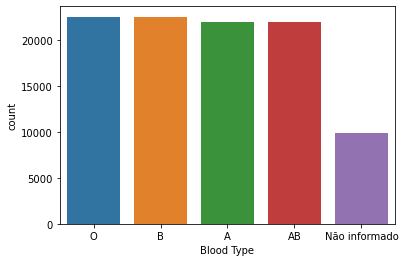

In [87]:
sns.countplot(df_sem_duplicados['Blood Type'])

In [88]:
df_sem_duplicados['Blood Type'].value_counts()

O                22577
B                22559
A                21985
AB               21960
Não informado     9895
Name: Blood Type, dtype: int64

A maioria dos estudantes tem tipo sanguineo O ou B

In [67]:
df_sem_duplicados.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,98976.000000,98976.000000,98976.000000,98976.000000,98976.000000,98976.000000,98976.000000,98976.000000,98976.000000
mean,49996.307610,26.013427,174.934591,69.963773,23.335659,98.600653,79.505083,114.549308,184.493832
std,28872.767544,4.639894,13.699669,16.447560,6.674264,0.474364,10.953030,13.673745,35.638178
min,1.000000,18.000000,150.000329,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24995.750000,22.000000,163.854738,56.582091,18.381241,98.306932,71.000000,104.000000,156.000000
50%,49985.500000,26.000000,174.886452,69.961270,23.344400,98.600843,79.508913,114.563642,184.464806
75%,75000.250000,30.000000,186.064463,83.334917,27.248571,98.896034,88.000000,126.000000,213.000000
max,100000.000000,34.000000,199.998639,99.999907,44.314074,100.824857,99.000000,139.000000,249.000000


- A média e mediana da idade dos estudantes é 26 anos, e 75% dos estudantes tem idade abaixo de 30 anos.

- A média e mediana da altura dos estudantes é aproximadamente 175. 75% dos estudantes tem altura abaixo de 186

- O peso médio e a mediana dos estudantes é 70

Para as variáveis numéricas contínuas vou visualizar o histograma e calcular o valor de Skeweness para saber se as variáveis são assimétricas. Valores zero da skewness indicam que os dados têm distribuição simétrica em relação ao centro. Valores positivos indicam que a distribuição tem assimetria positiva, ou seja, a cauda direita é mais longa do que a cauda esquerda. Valores negativos indicam que a distribuição tem assimetria negativa, ou seja, a cauda esquerda é mais longa do que a cauda direita.

<AxesSubplot:xlabel='Age', ylabel='Count'>

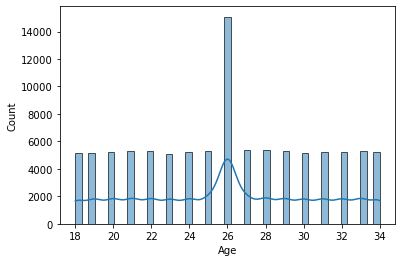

In [113]:
sns.histplot(data = df_sem_duplicados.Age, kde=True)


In [114]:
df_sem_duplicados.Age.skew()

-0.0013801677709123108

Valor apesar de negativo está próximo de 0, o que indica que os dados têm distribuição simétrica em relação ao centro.

<AxesSubplot:xlabel='Height', ylabel='Count'>

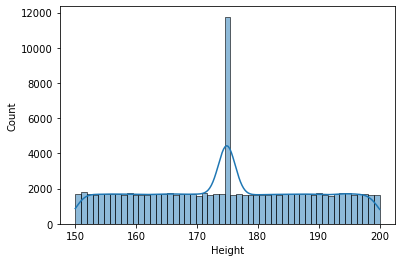

In [68]:
sns.histplot(data = df_sem_duplicados.Height, kde=True)


In [107]:
df_sem_duplicados.Height.skew()

0.003953909503300535

Valor também está próximo de 0 indicando que os dados têm distribuição simétrica em relação ao centro.

<AxesSubplot:xlabel='Weight', ylabel='Count'>

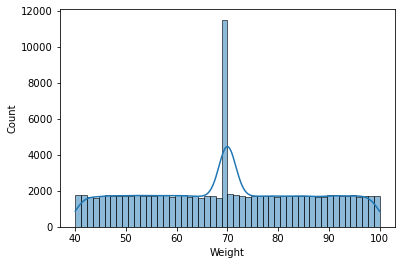

In [69]:
sns.histplot(data = df_sem_duplicados.Weight, kde=True)


In [108]:
df_sem_duplicados.Weight.skew()

0.004767737252512105

Valor também está próximo de 0 indicando que os dados têm distribuição simétrica em relação ao centro.

<AxesSubplot:xlabel='BMI', ylabel='Count'>

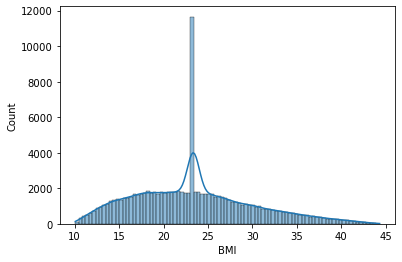

In [70]:
sns.histplot(data = df_sem_duplicados.BMI, kde=True)


In [109]:
df_sem_duplicados.BMI.skew()

0.4634020864261758

Valor está positivo indicando que a distribuição tem assimetria positiva, ou seja, a cauda direita é mais longa do que a cauda esquerda.

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

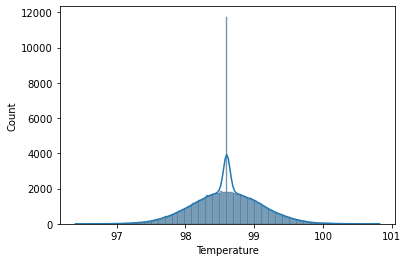

In [71]:
sns.histplot(data = df_sem_duplicados.Temperature, kde=True)


In [110]:
df_sem_duplicados.Temperature.skew()

0.010523641889019936

Valor também está próximo de 0 indicando que os dados têm distribuição simétrica em relação ao centro.

<AxesSubplot:xlabel='Heart Rate', ylabel='Count'>

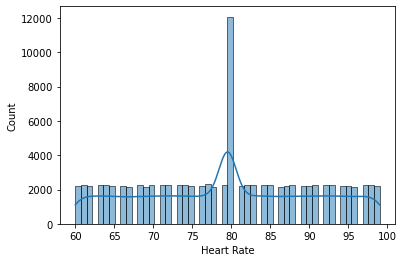

In [72]:
sns.histplot(data = df_sem_duplicados['Heart Rate'], kde=True)


In [111]:
df_sem_duplicados['Heart Rate'].skew()

-0.001589594482123511

Valor apesar de negativo está próximo de 0 indicando que os dados têm distribuição simétrica em relação ao centro.

<AxesSubplot:xlabel='Blood Pressure', ylabel='Count'>

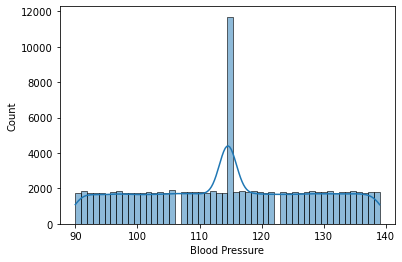

In [73]:
sns.histplot(data = df_sem_duplicados['Blood Pressure'], kde=True)


In [112]:
df_sem_duplicados['Blood Pressure'].skew()

-0.004582058228532002

Valor também está negativo porém próximo de 0 indicando que os dados têm distribuição simétrica em relação ao centro.

Aparentemente temos um valor outlier que está dificuldade a retirada dos insighst

/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_37204/332443270.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


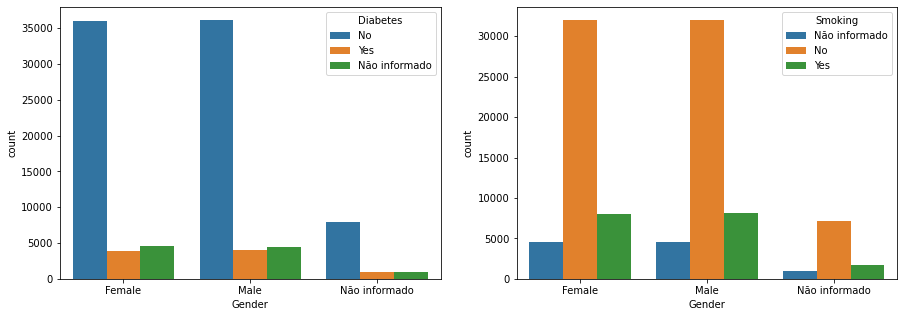

In [85]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='Gender', hue='Diabetes', data=df_sem_duplicados, ax=ax[0])
sns.countplot(x='Gender', hue='Smoking', data=df_sem_duplicados, ax=ax[1])

fig.show()

A maioria dos estudantes femininos e masculinos não são diabéticos e não fumam

<AxesSubplot:xlabel='Gender', ylabel='count'>

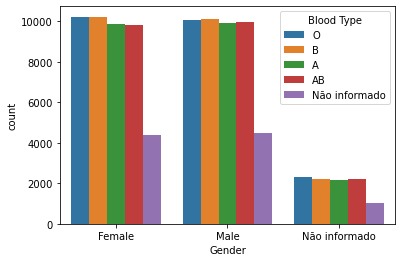

In [86]:
sns.countplot(x='Gender', hue='Blood Type', data=df_sem_duplicados)


A maioria do tipo sanguineo dos estudantes masculinos de medicina são do tipo sanguineo B. Já para as estudantes a quantidade entre pessoas do tipo O e B aparentam ser bem próximos

<AxesSubplot:xlabel='Heart Rate', ylabel='Count'>

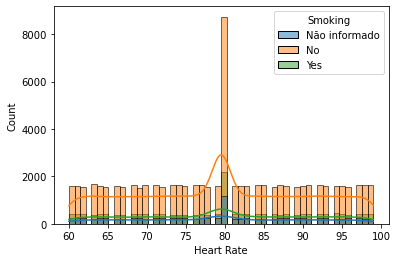

In [89]:
sns.histplot(data = df_sem_duplicados,x ='Heart Rate',kde=True,hue='Smoking')


<AxesSubplot:xlabel='Heart Rate', ylabel='Smoking'>

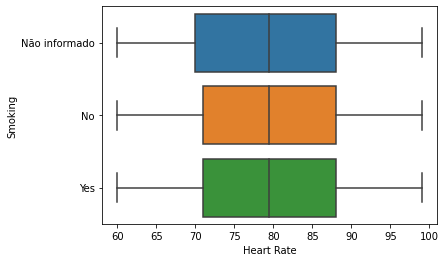

In [102]:
sns.boxplot(data=df_sem_duplicados, x="Heart Rate", y="Smoking")


<AxesSubplot:xlabel='Blood Pressure', ylabel='Count'>

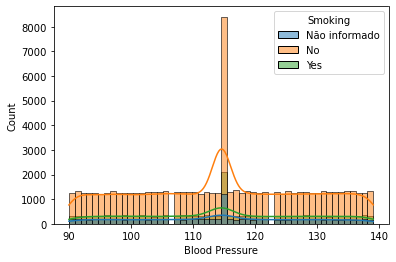

In [90]:
sns.histplot(data = df_sem_duplicados,x ='Blood Pressure',kde=True,hue='Smoking')


<AxesSubplot:xlabel='Blood Pressure', ylabel='Smoking'>

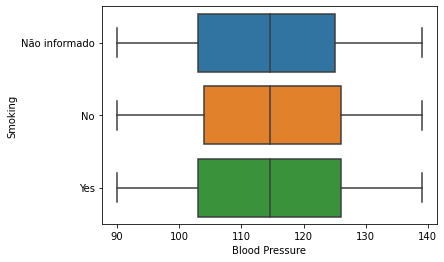

In [101]:
sns.boxplot(data=df_sem_duplicados, x="Blood Pressure", y="Smoking")


<AxesSubplot:xlabel='BMI', ylabel='Count'>

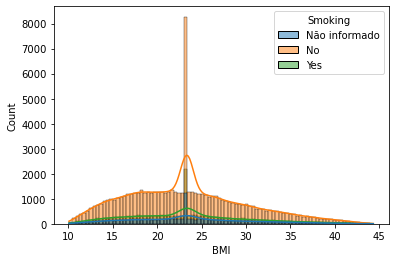

In [91]:
sns.histplot(data = df_sem_duplicados,x ='BMI',kde=True,hue='Smoking')


<AxesSubplot:xlabel='BMI', ylabel='Smoking'>

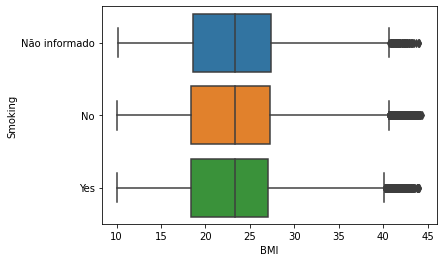

In [100]:
sns.boxplot(data=df_sem_duplicados, x="BMI", y="Smoking")


<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

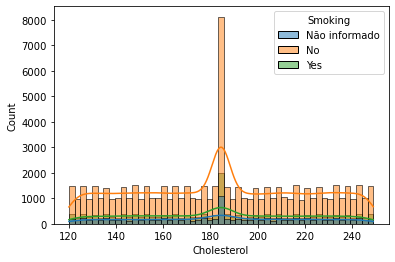

In [92]:
sns.histplot(data = df_sem_duplicados,x ='Cholesterol',kde=True,hue='Smoking')


<AxesSubplot:xlabel='Cholesterol', ylabel='Smoking'>

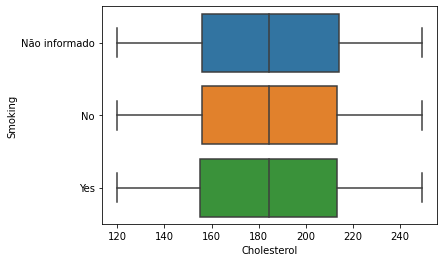

In [99]:
sns.boxplot(data=df_sem_duplicados, x="Cholesterol", y="Smoking")


/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_37204/1137535938.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


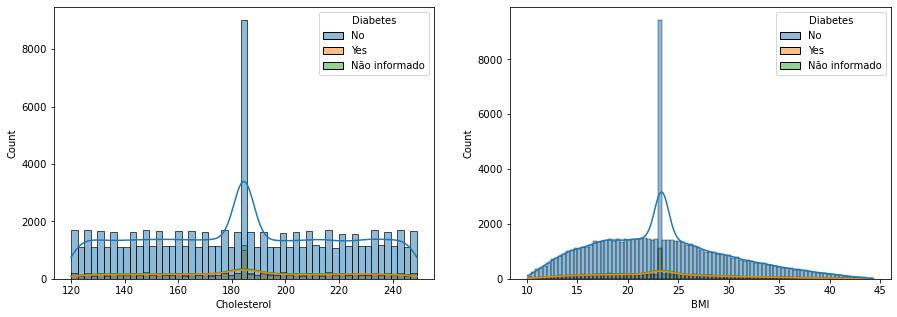

In [93]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data = df_sem_duplicados,x ='Cholesterol',kde=True,hue='Diabetes', ax=ax[0])
sns.histplot(data = df_sem_duplicados,x ='BMI',kde=True,hue='Diabetes', ax=ax[1])

fig.show()

<AxesSubplot:xlabel='Cholesterol', ylabel='Diabetes'>

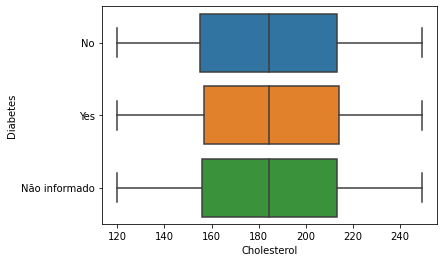

In [97]:
sns.boxplot(data=df_sem_duplicados, x="Cholesterol", y="Diabetes")


<AxesSubplot:xlabel='BMI', ylabel='Diabetes'>

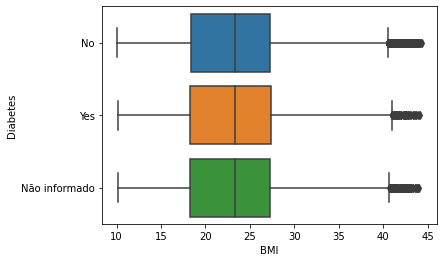

In [98]:
sns.boxplot(data=df_sem_duplicados, x="BMI", y="Diabetes")


/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_37204/718656024.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


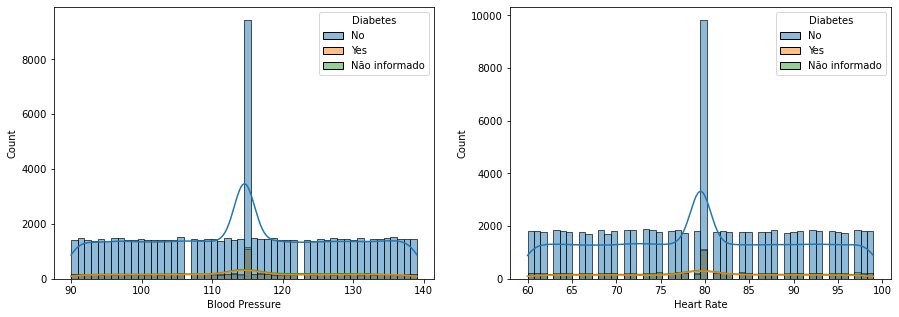

In [94]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data = df_sem_duplicados,x ='Blood Pressure',kde=True,hue='Diabetes', ax=ax[0])
sns.histplot(data = df_sem_duplicados,x ='Heart Rate',kde=True,hue='Diabetes', ax=ax[1])

fig.show()

<AxesSubplot:xlabel='Blood Pressure', ylabel='Diabetes'>

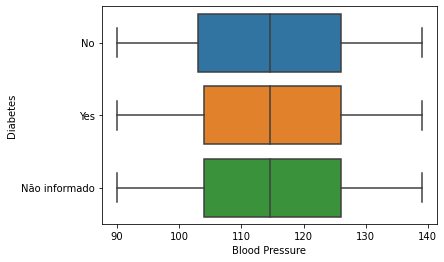

In [96]:
sns.boxplot(data=df_sem_duplicados, x="Blood Pressure", y="Diabetes")


<AxesSubplot:xlabel='Heart Rate', ylabel='Diabetes'>

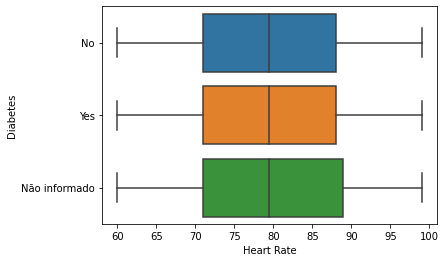

In [95]:
sns.boxplot(data=df_sem_duplicados, x="Heart Rate", y="Diabetes")



Em todas essas distribuições não conseguimos enxergar visualmente uma correlação entre os estudantes ser diabético ou não, e se é fumante ou não, com as outras variáveis numéricas: Heart Rate, Blood Pressure, BMI, Cholesterol. Isso pode ser identificado tanto nos boxplot quanto nos histogramas

/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_37204/3771041016.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


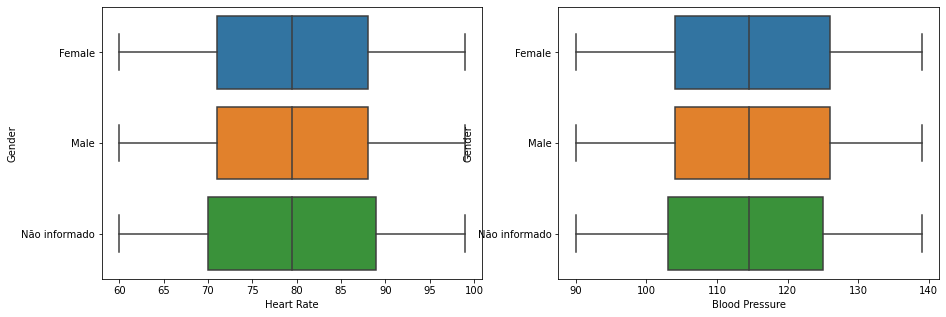

In [105]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data = df_sem_duplicados,x="Heart Rate", y="Gender", ax=ax[0])
sns.boxplot(data = df_sem_duplicados,x ='Blood Pressure',y='Gender', ax=ax[1])

fig.show()

/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_37204/171022713.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


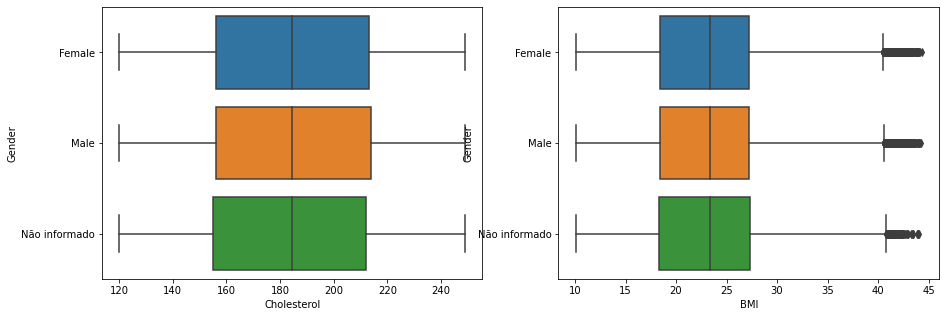

In [106]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data = df_sem_duplicados,x="Cholesterol", y="Gender", ax=ax[0])
sns.boxplot(data = df_sem_duplicados,x ='BMI',y='Gender', ax=ax[1])

fig.show()

Os dados aparentam não estarem tão confiáveis pois pela distribuição dos dados não há diferença entre homens e mulheres por exemplo da massa corporal da pessoal, frequência cardíaca e pressão sanguinea. O que sabemos que há diferença entre os gêneros quando envolve informações biológicas

In [116]:
df_sem_duplicados.Gender.value_counts()

Male             44600
Female           44519
Não informado     9857
Name: Gender, dtype: int64

In [119]:
class_female = df_sem_duplicados.loc[df_sem_duplicados['Gender'] == ]["Age"]
class_female

Series([], Name: Age, dtype: int64)

/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


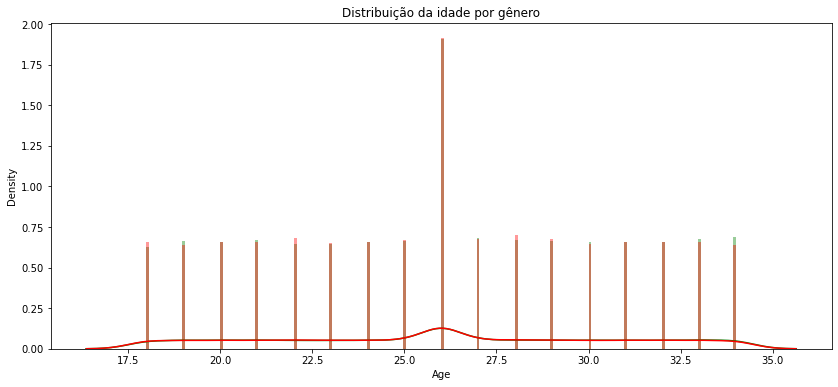

In [120]:
class_male = df_sem_duplicados.loc[df_sem_duplicados['Gender'] == 'Male']["Age"]
class_female = df_sem_duplicados.loc[df_sem_duplicados['Gender'] == 'Female']["Age"]
plt.figure(figsize = (14,6))
plt.title('Distribuição da idade por gênero')
sns.distplot(class_male,kde=True,bins=200, color="green")
sns.distplot(class_female,kde=True,bins=200, color="red")
plt.show()

Aparenta não ter diferença de idade entre os gêneros

<div style="text-align:right;">
Laura Damacenode Almeida
    <br>
